In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import baostock as bs
import pandas as pd
import mplfinance as mpf

# 登录baostock系统
lg = bs.login()

# 设置股票代码和时间范围
stock_code = "sh.603486"  # 上证指数
start_date = "2024-01-01"
end_date = "2024-12-31"

# 获取股票数据
rs = bs.query_history_k_data(stock_code,
                              "date,open,high,low,close,volume",
                              start_date=start_date,
                              end_date=end_date,
                              frequency="d",
                              adjustflag="3")  # adjustflag="3"表示不复权
data = rs.get_data()

# 登出baostock系统
bs.logout()


# 创建DataFrame
df = data[['date', 'open', 'high', 'low', 'close', 'volume']].rename(columns={'date': 'Date'})

df.head(1)

# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])
# 设置日期列为索引
df.set_index('Date', inplace=True)  

df.head(1)
df.index[0]


login success!
logout success!


,Date,open,high,low,close,volume
0,2024-01-02,41.5000,41.6100,40.6100,40.6400,3356990


,open,high,low,close,volume
Date,,,,,
2024-01-02,41.5000,41.6100,40.6100,40.6400,3356990


Timestamp('2024-01-02 00:00:00')

In [3]:
# 将股价数据转换为数值类型
df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)


# 设置蜡烛图数据
# ohlc = df[['open', 'high', 'low', 'close','volume']]


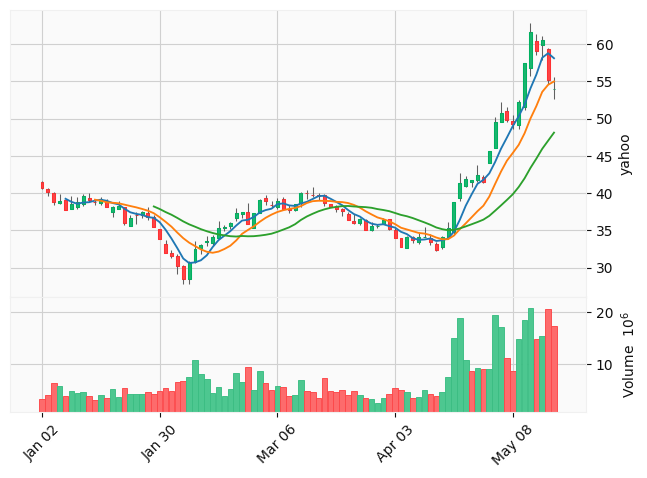

In [4]:

mpf.plot(df, type='candle', style="yahoo", mav=(5,10,20), volume=True,  ylabel="yahoo")

In [5]:
import numpy as np
def mark_buy_sell_points(data, low_col='low', high_col='high'):
    buy_signals = []
    sell_signals = []

    previous_low = 2
    previous_high = 0

    buy_signals.append(np.nan)
    buy_signals.append(np.nan)
    sell_signals.append(np.nan)
    sell_signals.append(np.nan)

    for i in range(2, len(data)-2):
        # 123法则条件判断
        if data['low'][i] < data['low'][i-1] and data['low'][i] < data['low'][i-2] and data['low'][i] < data['low'][i+1] and data['low'][i] < data['low'][i+2]:
            buy_signals.append(data['low'][i])
            previous_low = data['low'][i]
        else:
            buy_signals.append(np.nan)

        if data['high'][i] > data['high'][i-1] and data['high'][i] > data['high'][i-2] and data['high'][i] > data['high'][i+1] and data['high'][i] > data['high'][i+2]:
            sell_signals.append(data['high'][i])
            previous_high = data['high'][i]
        else:
            sell_signals.append(np.nan)

    buy_signals.append(np.nan)
    buy_signals.append(np.nan)
    sell_signals.append(np.nan)
    sell_signals.append(np.nan)

    return buy_signals, sell_signals


# 创建一个包含买卖点标记的addplot对象列表
buy_signals, sell_signals = mark_buy_sell_points(df)
buy_signals[0]
sell_signals[0]


C:\Users\huzhe\AppData\Local\Temp\ipykernel_21524\296944520.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['low'][i] < data['low'][i-1] and data['low'][i] < data['low'][i-2] and data['low'][i] < data['low'][i+1] and data['low'][i] < data['low'][i+2]:
C:\Users\huzhe\AppData\Local\Temp\ipykernel_21524\296944520.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['high'][i] > data['high'][i-1] and data['high'][i] > data['high'][i-2] and data['high'][i] > data['high'][i+1] and data['high'][i] > data['high'][i+2]:
C:\Users\huzhe\AppData\Local\Temp\ipykernel_21524\296944520.py:17: FutureWarning: Seri

nan

nan

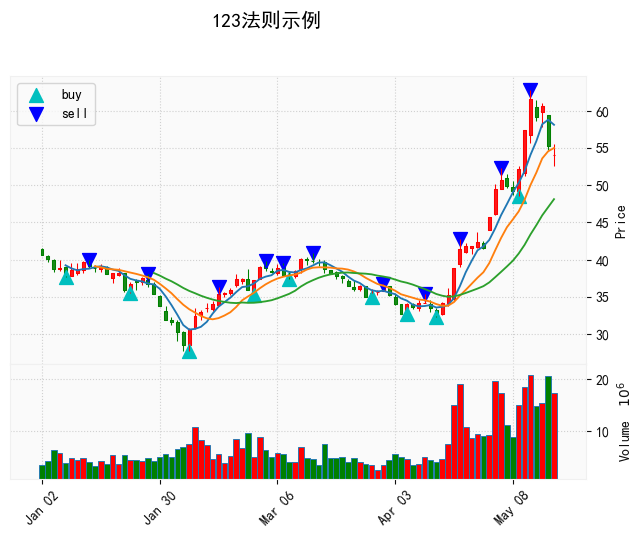

In [6]:

# 创建一个包含买卖点标记的addplot对象列表
apds = [
    mpf.make_addplot(buy_signals, type='scatter', markersize=100, marker='^', color='c', label="buy"),
    mpf.make_addplot(sell_signals, type='scatter', markersize=100, marker='v', color='b',label="sell"),
]

mc = mpf.make_marketcolors(up='red', down='green', edge='i', wick='i', volume='in')
s = mpf.make_mpf_style(marketcolors=mc, gridstyle=':', base_mpf_style='yahoo', rc={'font.family': 'SimHei'})

# 绘制K线图
mpf.plot(df, type='candle', style=s, addplot=apds, mav=(5,10,20),  volume=True, title='123法则示例')

